vector_desfase:  [100, 200, 300, 400, 500, 600]


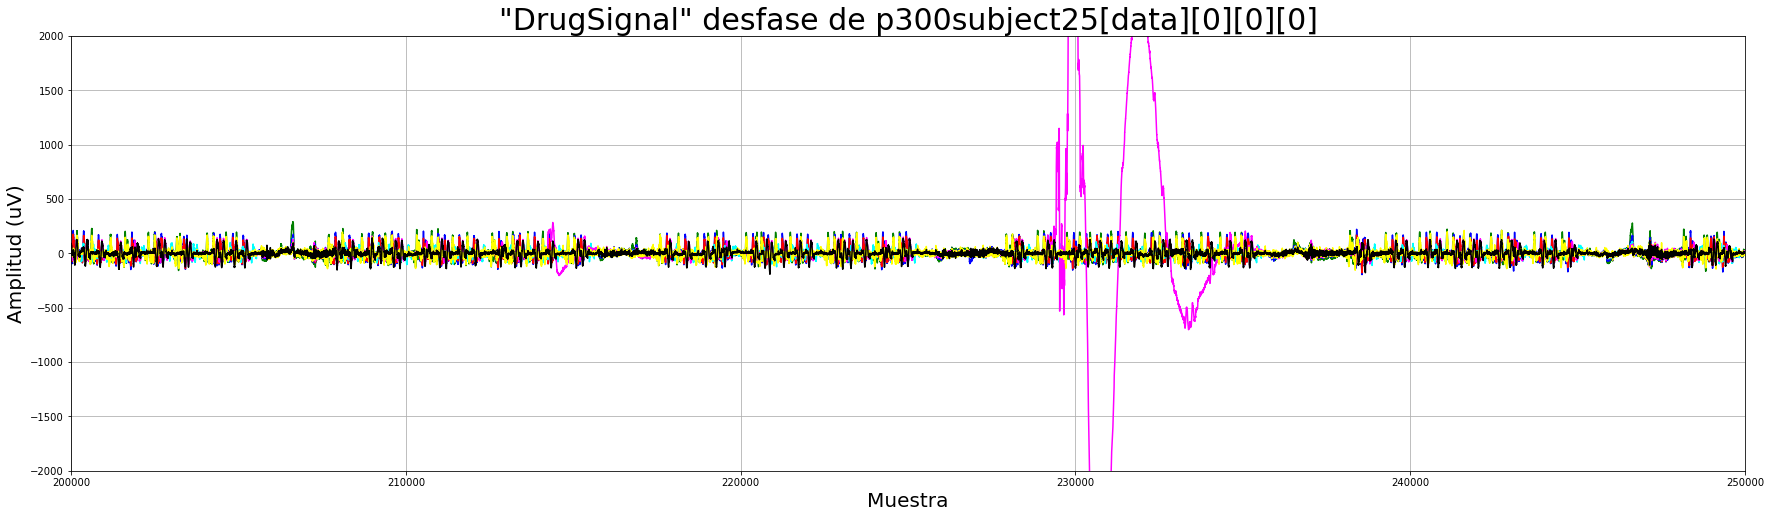

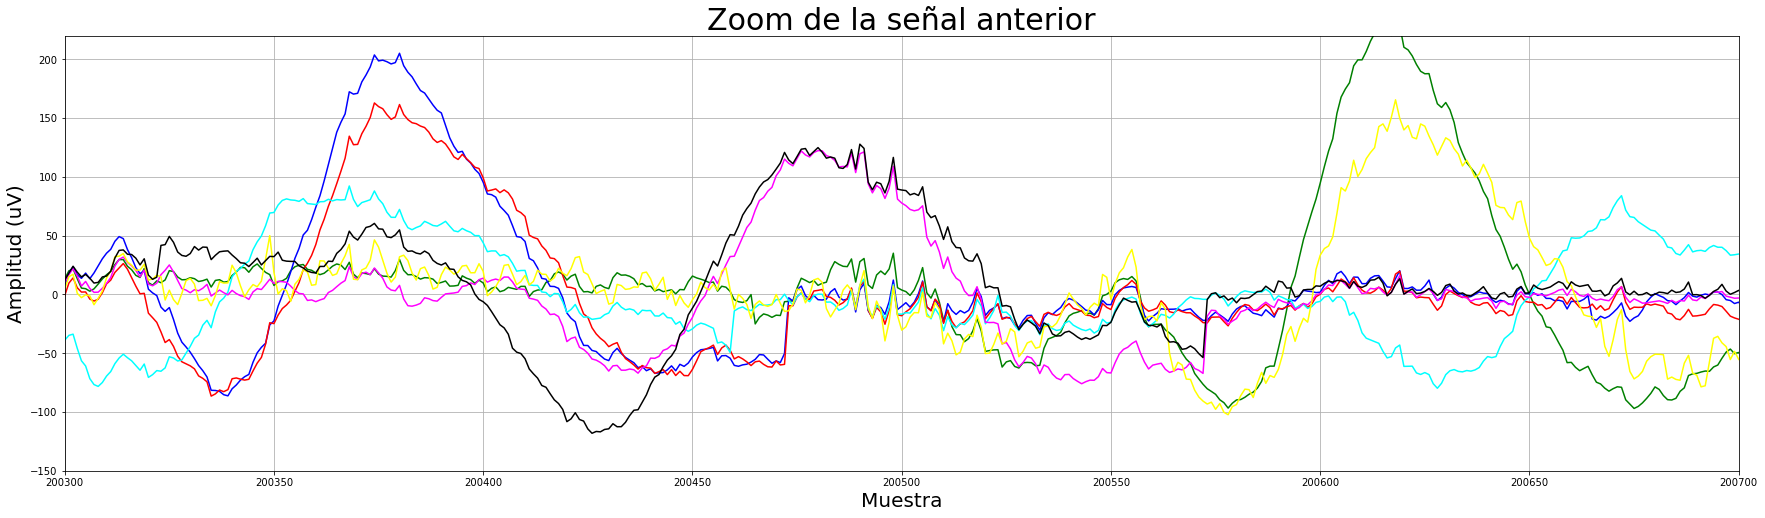

(None, None)

In [2]:
#-----------------------------------------------------------------------
# Librerías y algunas variables
#-----------------------------------------------------------------------
import mne                                                              # pip install mne
mne.set_log_level('WARNING')                                            # Luego averiguar ¿para qué?
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb      
import random                                              # Por ahora lo voy a usar para cambiar los nombres de las columnas

import a_funciones as a_fun  

color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas
xlabel = 'Muestra'
ylabel = 'Amplitud (uV)'

vector_desfase = [100, 200, 300, 400, 500, 600]
#vector_desfase = [0]                                     # Para graficar la señal sin alteraciones en fase, como referencia.
print(f'vector_desfase: ',vector_desfase)

def DrugSignal(signal, t_flash):
    for j in range(0,7):
        desfase = random.choice(vector_desfase)
        for i in range(0,4200):
            if (t_flash[i,3]==2):
                #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)    ORIGINAL
                signal[t_flash[i,0]-desfase:t_flash[i,0]+250-desfase,j] += (erptemplate1[:,j]*30)                                                                                 
    return signal
#-----------------------------------------------------------------------
# Carga de archivos para proceso de señales
#-----------------------------------------------------------------------
mat = scipy.io.loadmat('./dataset/ERPTemplate.mat')
routput = mat['routput']

erptemplate1 = routput[0][7][0][1][0][0][0][7]                          # In this ERPTemplate, there are two different template signals that are good.
erptemplate2 = routput[0][7][0][1][0][0][0][0] 

erptemplate1 = np.delete( erptemplate1, range(0,256,43),0)              # The original ERPTemplate dataset has a sampling frequency of 256 so I need to perform a small downsampling to 250 Hz
erptemplate2 = np.delete( erptemplate2, range(0,256,43),0)

p300subject25 = scipy.io.loadmat('./dataset/p300-subject-25.mat')       # Now load the basal EEG stream

t_flash = p300subject25['data'][0][0][4]                                # Flash matrix
df_t_flash = a_fun.to_df(t_flash)

signal = p300subject25['data'][0][0][0]    

signal = DrugSignal(signal, t_flash)
df_signal = a_fun.to_df(signal)
#df_signal

plt.figure(figsize=(30,8))                                     
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
axes.set_title('"DrugSignal" desfase de p300subject25[data][0][0][0]'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([200000,250000]), plt.ylim([-2000,2000])
# plt.xlim([7000,15000]), plt.ylim([-90,110])
#plt.savefig("./a_images/DrugSignal_p300subject25[data][0][0][0].jpg")
plt.grid(), plt.show()

plt.figure(figsize=(30,8))                           
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
axes.set_title('Zoom de la señal anterior'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([200300,200700]), plt.ylim([-150,220])
#plt.xlim([0,100000]), plt.ylim([-650,650])
#plt.savefig("./a_images/DrguSignal_p300subject25[data][0][0][0]_ERPTemplatex100_zoom.jpg")
plt.grid(), plt.show()
